# {{simulation_key}}

## Simulation details
- Case: {{case}}
- Basin: {{basin}}
- Polygon: {{polygon}}
- Start date: {{start_date}}

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
zarr_store = "/global/cfs/projectdirs/m4746/Projects/Ocean-CDR-Atlas-v0/data/analysis/smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-10-01_00003.001.analysis.zarr"

In [5]:
dso = xr.open_zarr(zarr_store).compute() 

xarray.Dataset {
dimensions:
	time = 180 ;
	nlat = 384 ;
	nlon = 320 ;

variables:
	float32 ALK_ADD_SURF(time, nlat, nlon) ;
		ALK_ADD_SURF:cell_methods = time: mean ;
		ALK_ADD_SURF:grid_loc = 3111 ;
		ALK_ADD_SURF:long_name = Alkalinity ;
		ALK_ADD_SURF:units = meq/m^3 ;
	float64 ALK_FLUX(time) ;
		ALK_FLUX:cell_methods = time: mean ;
		ALK_FLUX:grid_loc = 2110 ;
		ALK_FLUX:long_name = Flux of Alk from forcing data ;
		ALK_FLUX:units = mol ;
	float64 ALK_FLUX_TOTAL(nlat, nlon) ;
		ALK_FLUX_TOTAL:cell_methods = time: mean ;
		ALK_FLUX_TOTAL:grid_loc = 2110 ;
		ALK_FLUX_TOTAL:long_name = Flux of Alk from forcing data ;
		ALK_FLUX_TOTAL:units = mol m$^{-2}$ ;
	float32 ALK_SURF(time, nlat, nlon) ;
		ALK_SURF:cell_methods = time: mean ;
		ALK_SURF:grid_loc = 3111 ;
		ALK_SURF:long_name = Alkalinity ;
		ALK_SURF:units = meq/m^3 ;
	float64 AREA_M2(nlat, nlon) ;
		AREA_M2:long_name = area of T cells ;
		AREA_M2:units = m^2 ;
	float32 DIC_ADD_SURF(time, nlat, nlon) ;
		DIC_ADD_SURF:cell_metho

## CDR Forcing

Text(0.5, 1.0, 'Alkalinity flux (total)')

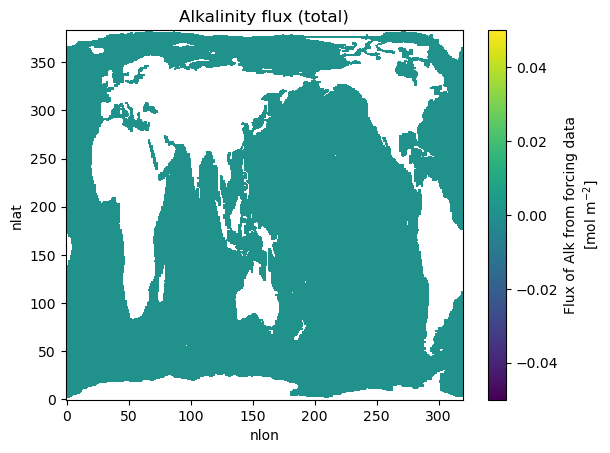

In [37]:
dso.ALK_FLUX_TOTAL.plot();
plt.title("Alkalinity flux");

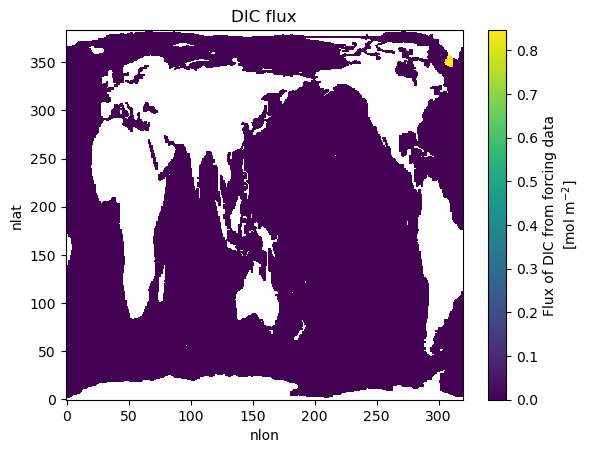

In [38]:
dso.DIC_FLUX_TOTAL.plot()
plt.title("DIC flux");

## Time series plots

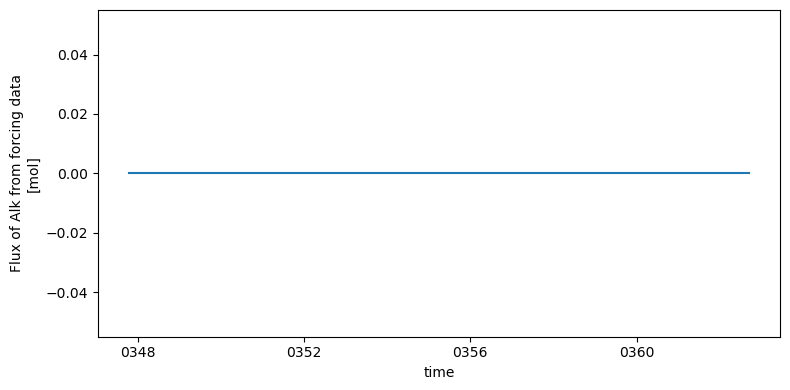

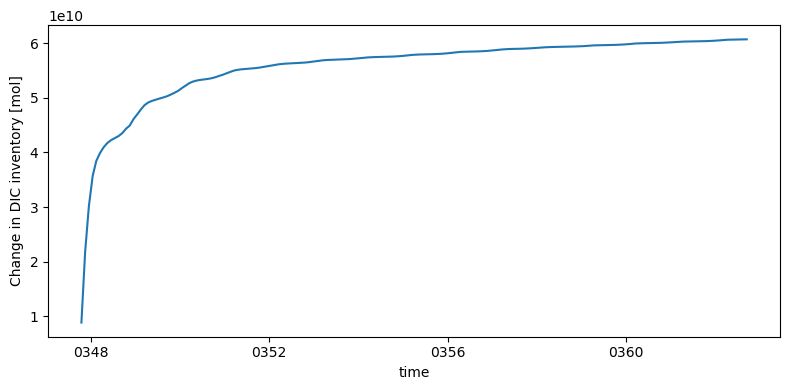

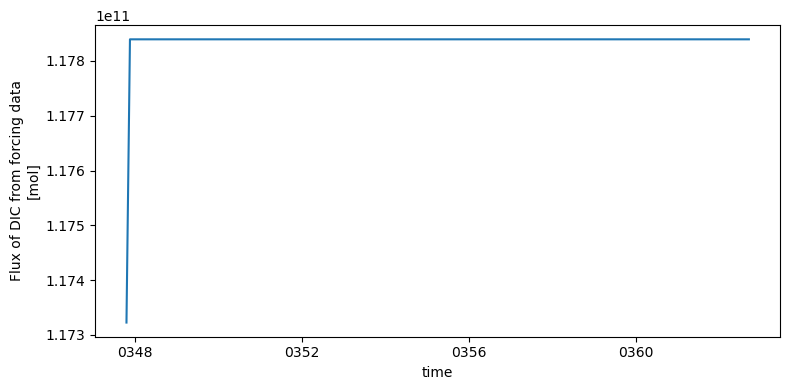

In [6]:
for v, da in dso.data_vars.items():
    if da.dims == ("time",):
        fig, axs = plt.subplots(1, 1, figsize=(6, 4))
        da.plot(ax=axs)
        plt.tight_layout()

## Maps of properties in time

ALK_ADD_SURF range: -0.000244140625 - -0.000244140625
constant field
ALK_SURF range: 2225.4550659179686 - 2487.1845703125


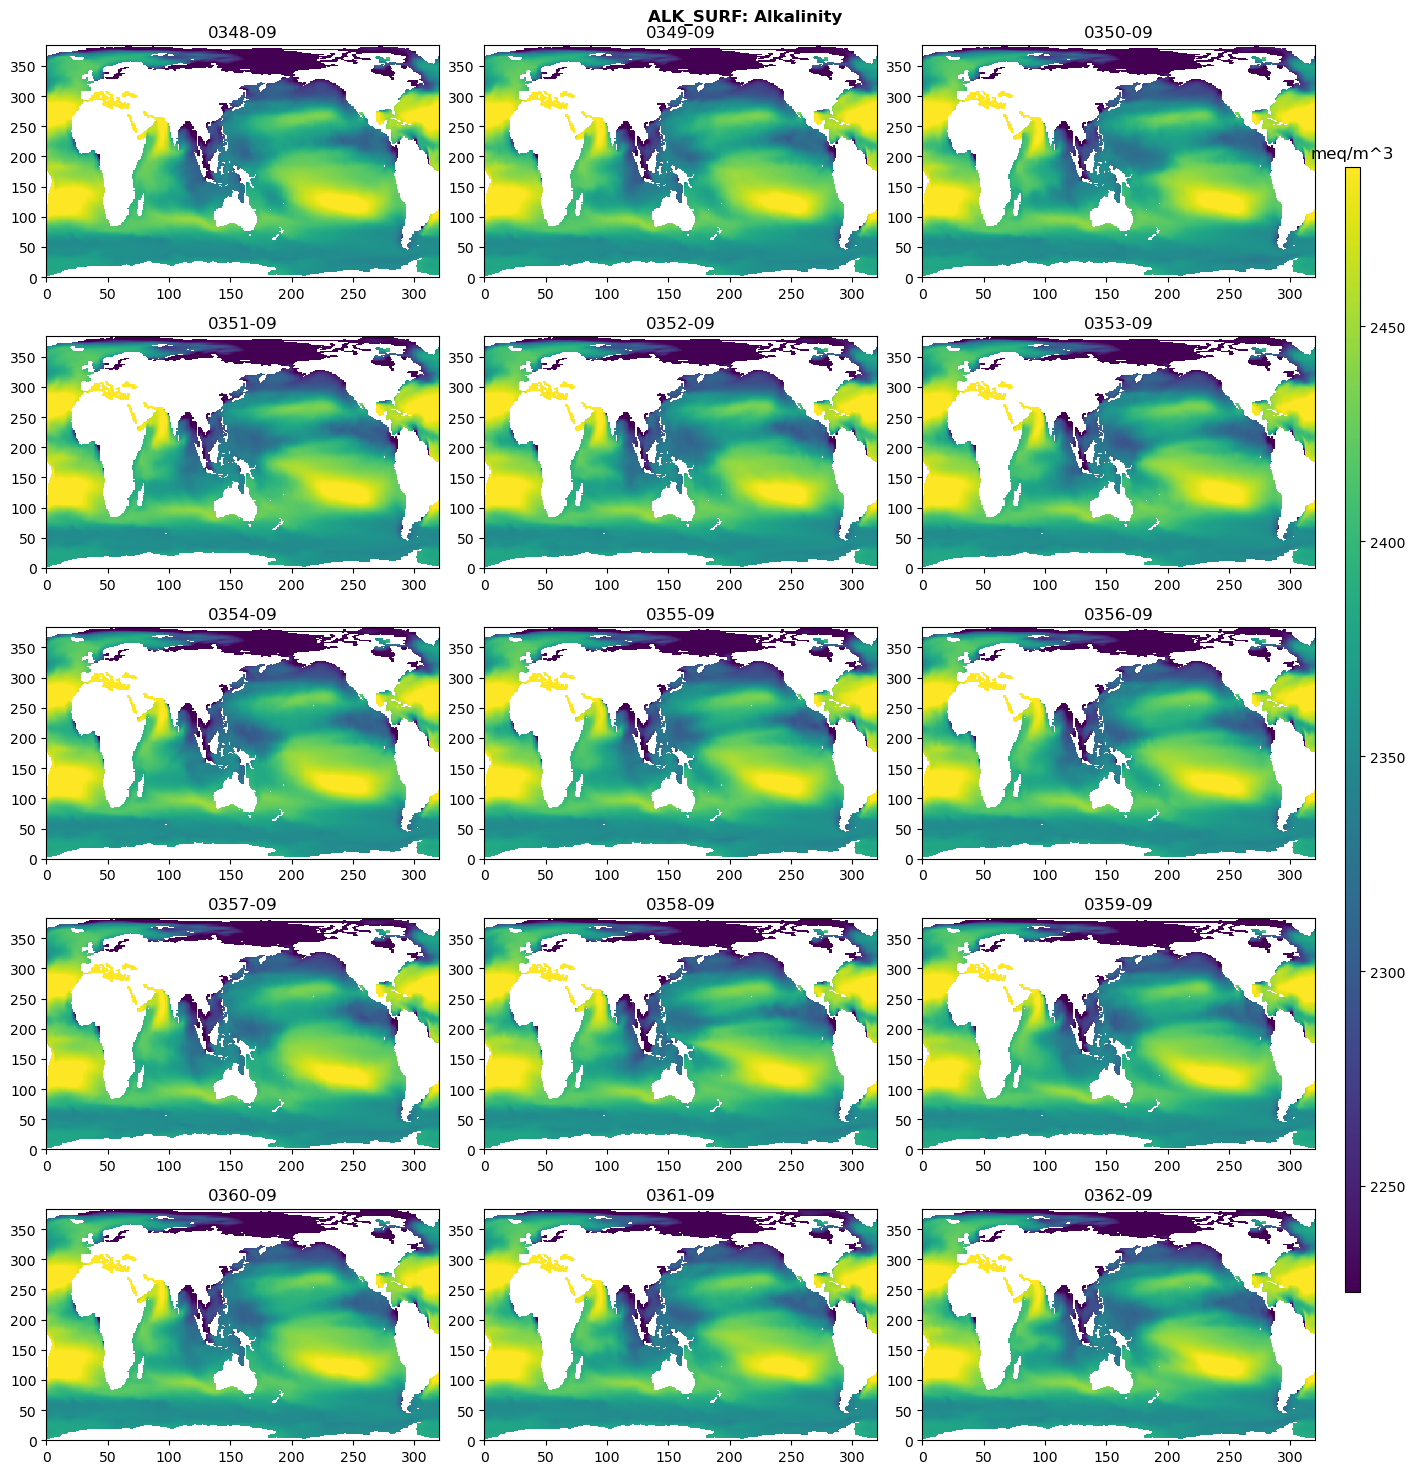


DIC_ADD_SURF range: -0.00537109375 - -0.000244140625


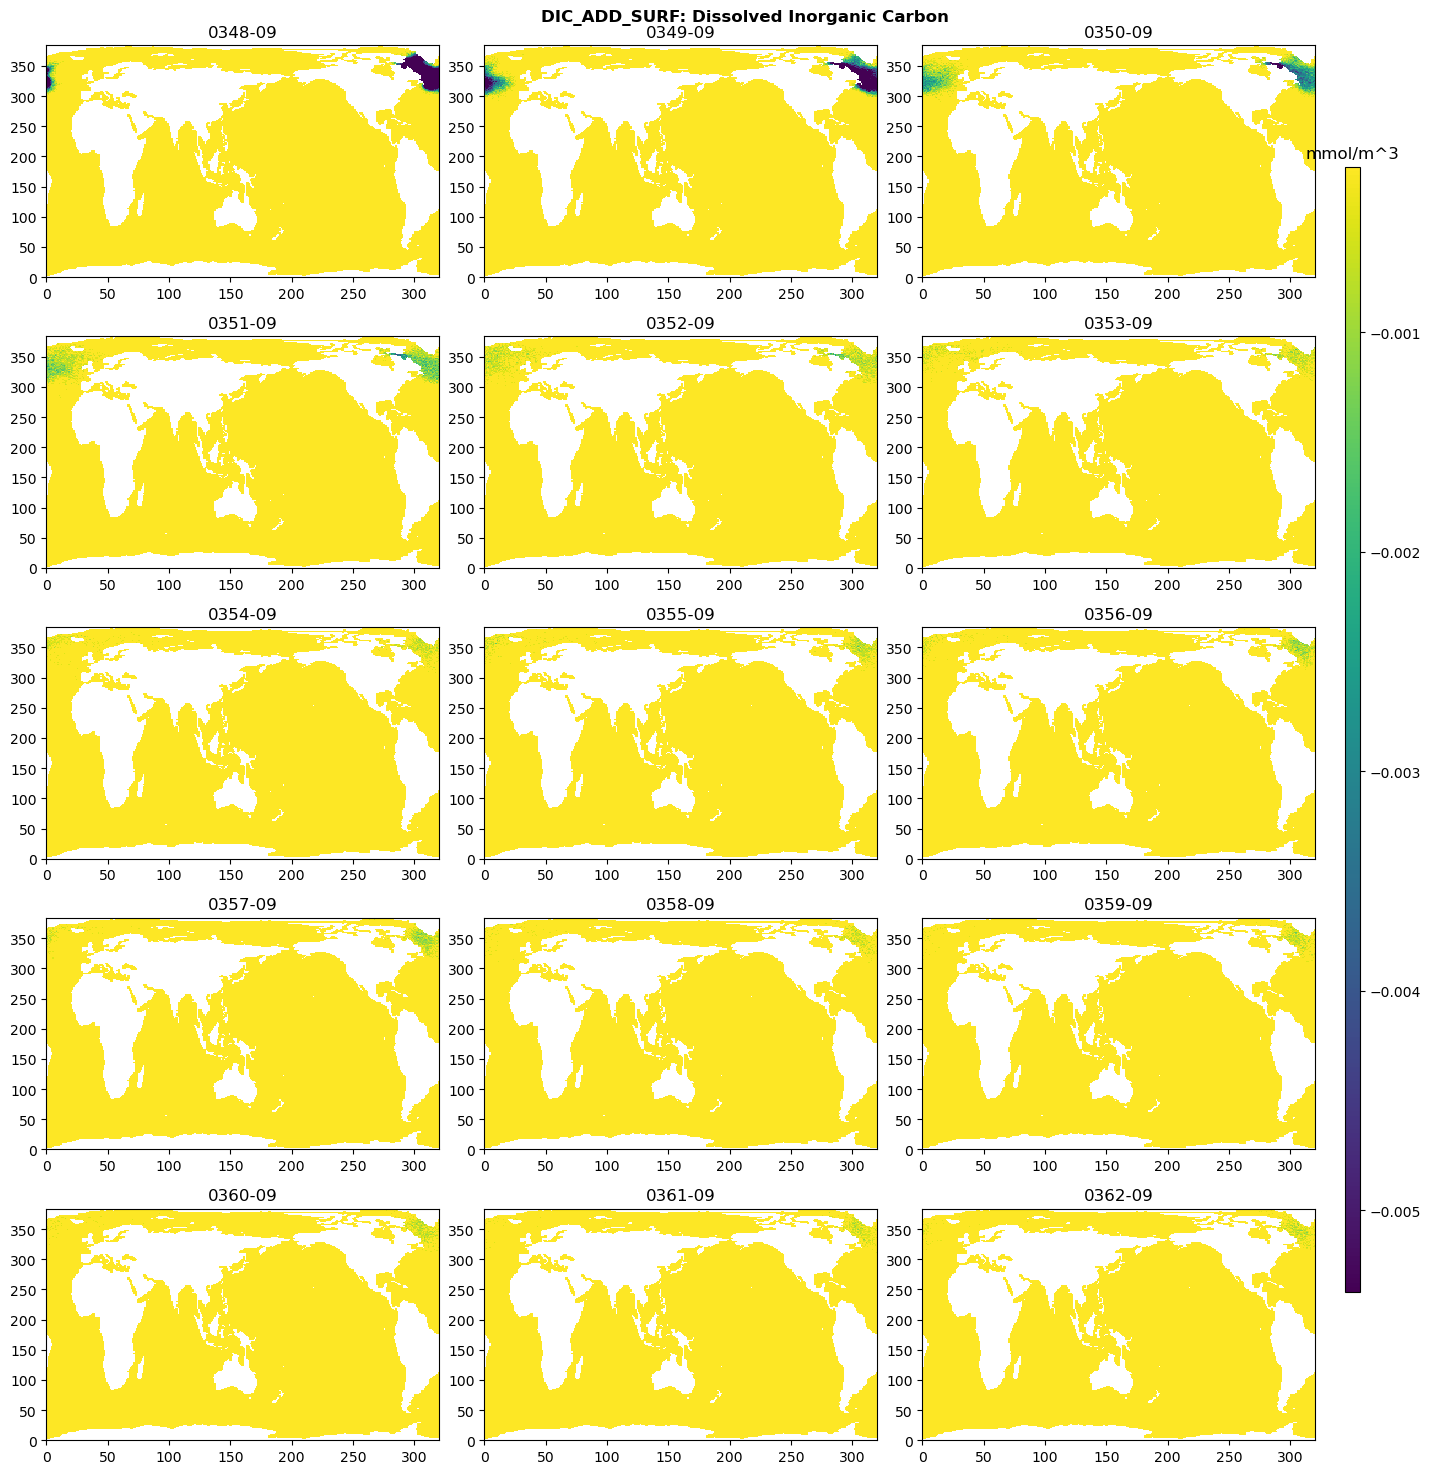


DIC_SURF range: 1965.53857421875 - 2225.359130859375


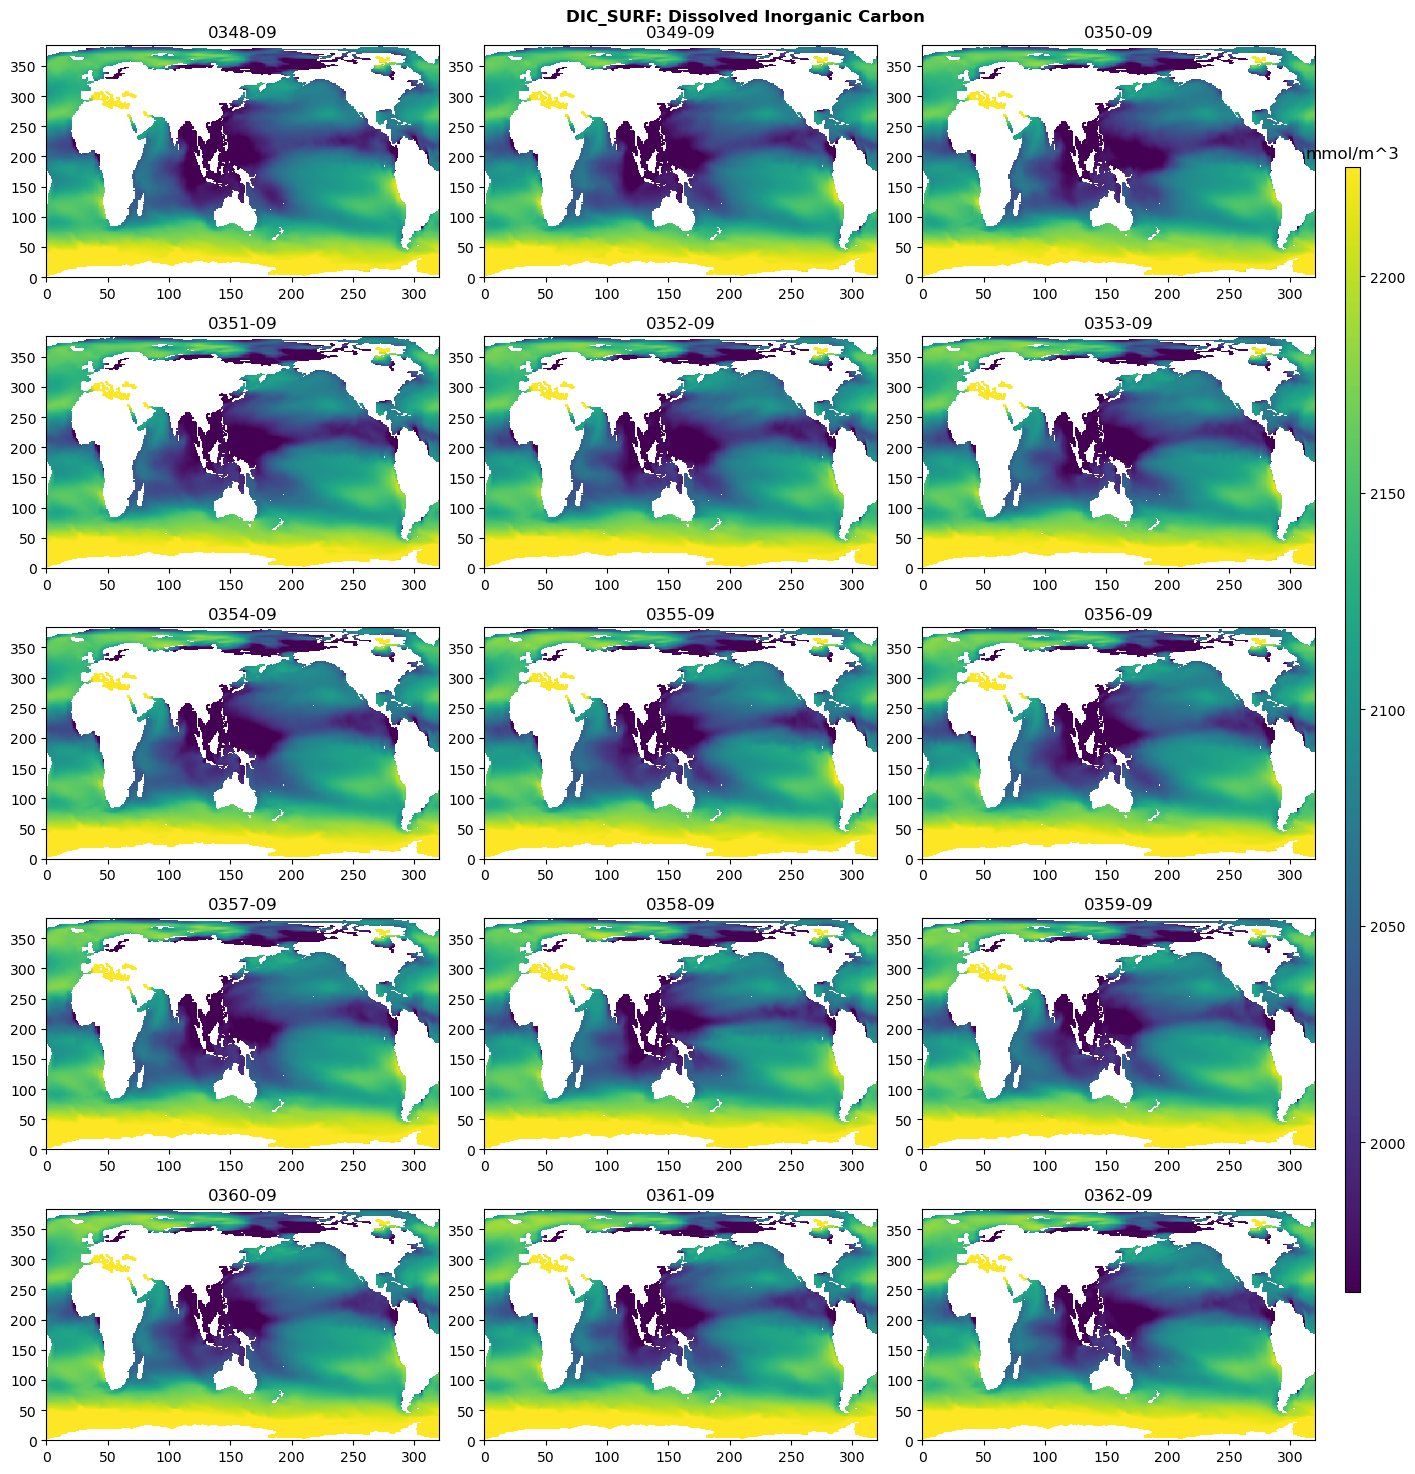


FG_CO2_ADD range: -6.901993765495718e-05 - -1.1472729433137374e-09


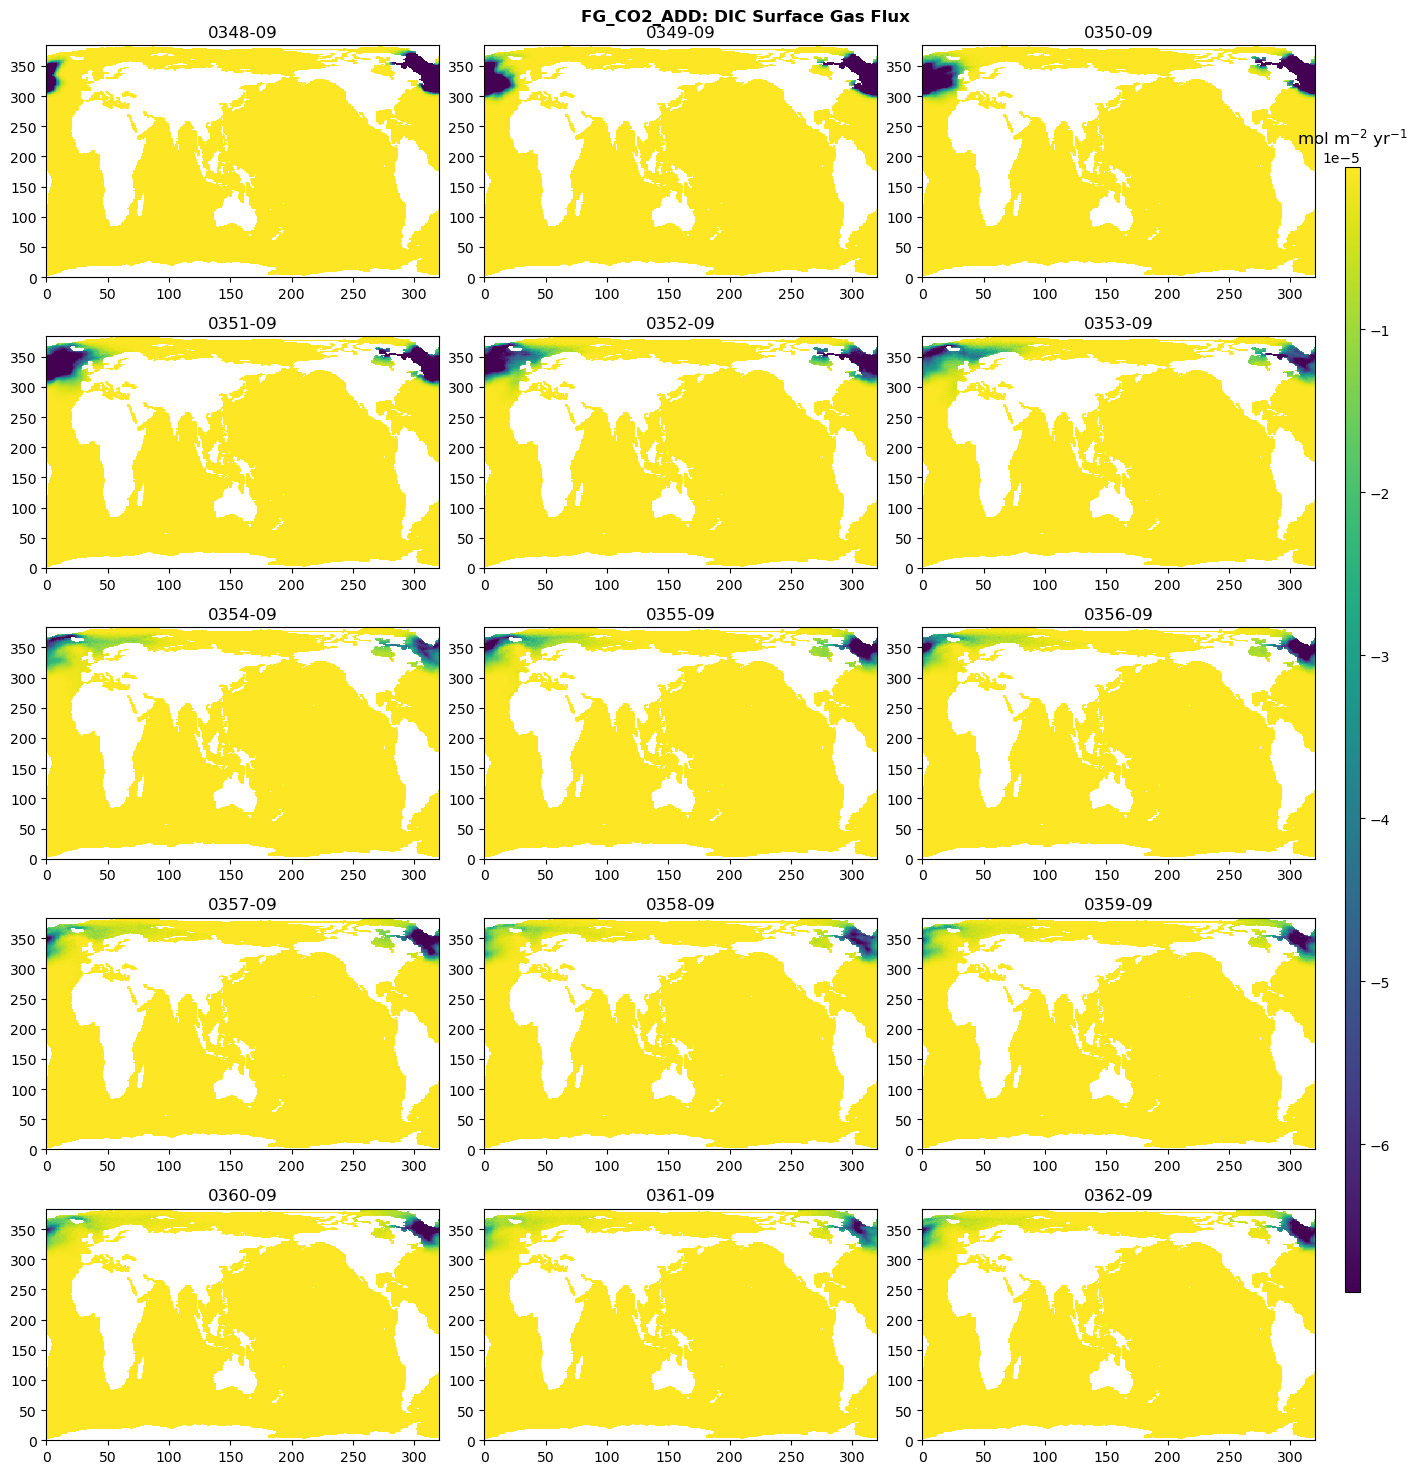


PH_ADD_SURF range: 9.5367431640625e-07 - 1.71661376953125e-05


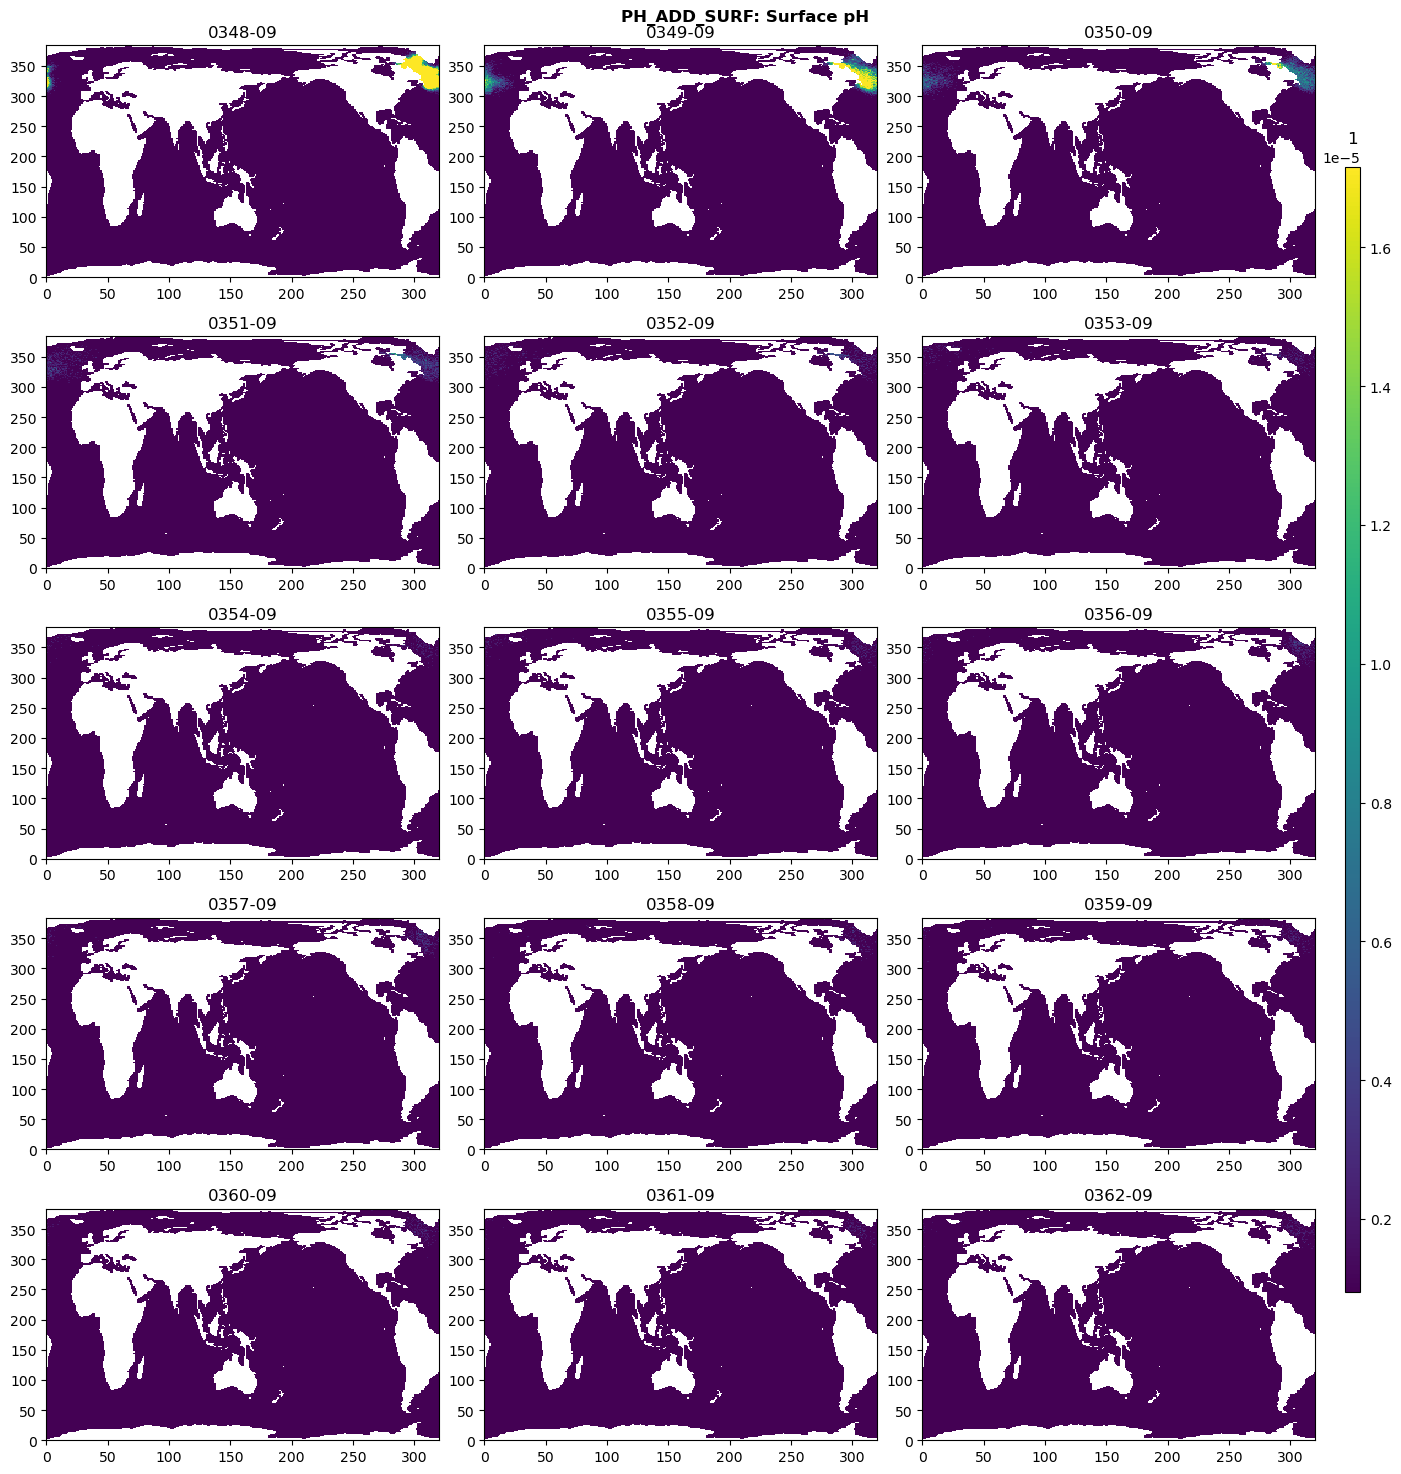


pCO2_ADD_SURF range: -0.003204345703125 - -3.0517578125e-05


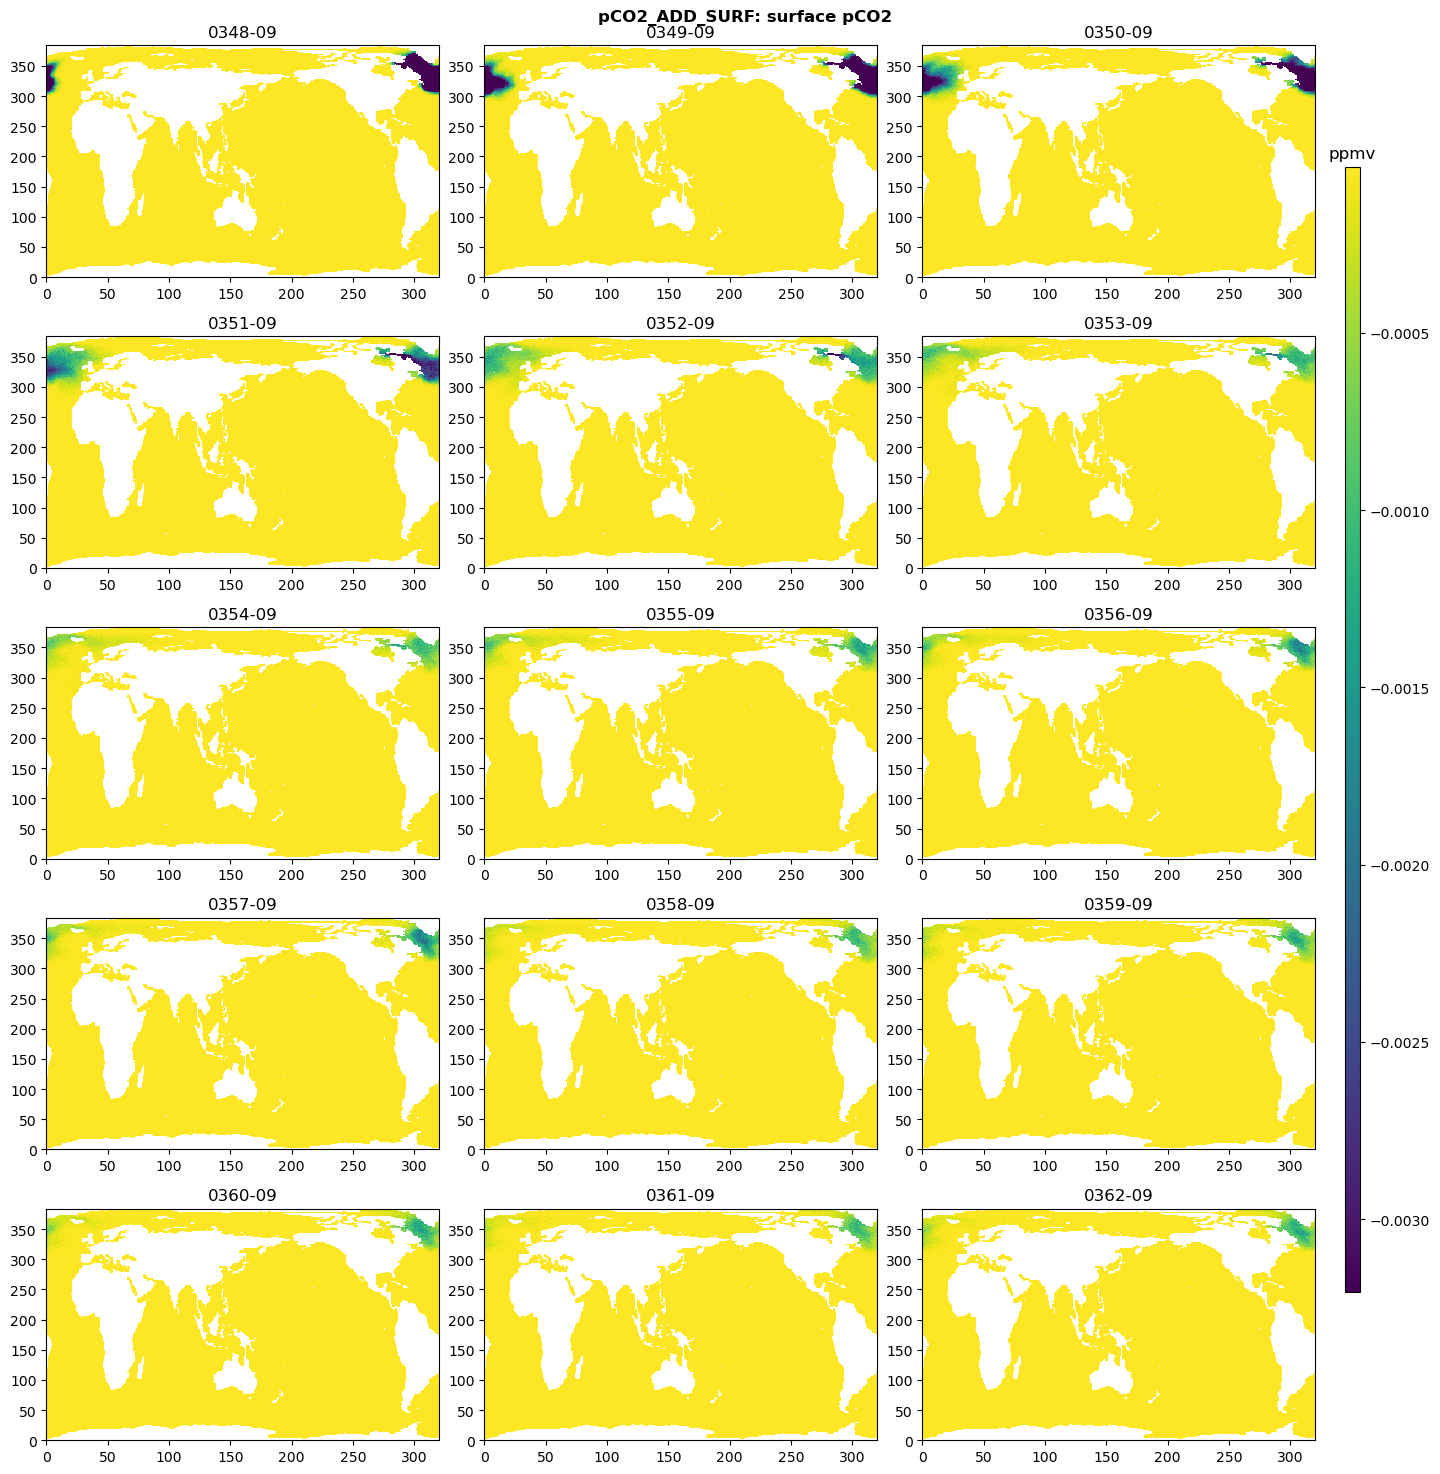

In [34]:
nyr = dso.sizes["time"] / 12
tndx = np.arange(11, nyr * 12, 12).astype(int)

ncol = 3
nrow = int(np.ceil(nyr / ncol).item())

for v, da in dso.data_vars.items():
    if da.dims == ("time", "nlat", "nlon",):
        
        print("=" * 80)
        
        vmin, vmax = np.nanpercentile(da.where(da != 0), [5, 95])
        
        cmap = "viridis"
        print(f"{v} range: {vmin} - {vmax}")
        if np.isclose(vmin, vmax):
            print("constant field")
            continue
    
        fig, axs = plt.subplots(nrow, ncol, figsize=(15, 15))
        
        for n, l in enumerate(tndx):
            i = int(np.floor(n / ncol))
            j = int(n - i * ncol)
            ax = axs[i, j]
            pc = ax.pcolormesh(da.isel(time=l), vmin=vmin, vmax=vmax, cmap=cmap)
            #da.isel(time=l).plot(ax=ax, vmin=vmin, vmax=vmax)
            ax.set_title(da.time.values[l].strftime("%Y-%m"))

        fig.suptitle(f"{v}: {da.attrs['long_name']}", fontweight="bold")
        
        fig.tight_layout()        
        fig.subplots_adjust(right=0.88)
        cax = fig.add_axes([0.9, 0.125, 0.01, 0.75])
        cax.set_title(f"{da.attrs['units']}")
        fig.colorbar(pc, cax=cax)      
        plt.show()
        print()
        